In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error 
import statsmodels.api as sm
import itertools
import warnings
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/VN30.csv')
df.drop(columns= 'Unnamed: 0', inplace= True)
df.set_index('Date', inplace= True)
df.index.name = None
df.head()

,ACB,MWG,MSN,BID,VRE,POW,PLX,HPG,VNM,VHM,...,GVR,SAB,BCM,MBB,GAS,SSB,SHB,SSI,STB,VPB
2020-01-02,9460,37730,46160,32369,34350,11352,48590,10930,81400,62600,...,10150.0,100180,28160.0,9680,68440,NaN,2990.0,8740,10200,7250
2020-01-03,9460,37170,46570,32229,34600,11161,49100,11000,81660,62820,...,10500.0,100440,27880.0,9700,68590,NaN,2900.0,8670,10200,7200
2020-01-06,9260,36990,45830,31610,33650,10827,49280,10930,81040,61500,...,10320.0,100080,27590.0,9560,70760,NaN,2860.0,8640,10050,7030
2020-01-07,9260,37270,46000,32229,33950,10731,48590,10790,81800,61790,...,10050.0,100180,26830.0,9580,70250,NaN,2860.0,8670,10150,7180
2020-01-08,9090,36370,45350,32509,32700,10254,47910,10680,82000,60830,...,9700.0,99810,26640.0,9450,70180,NaN,2860.0,8430,9980,7090


In [3]:
result = adfuller(df['ACB'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.244759
p-value: 0.654051
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


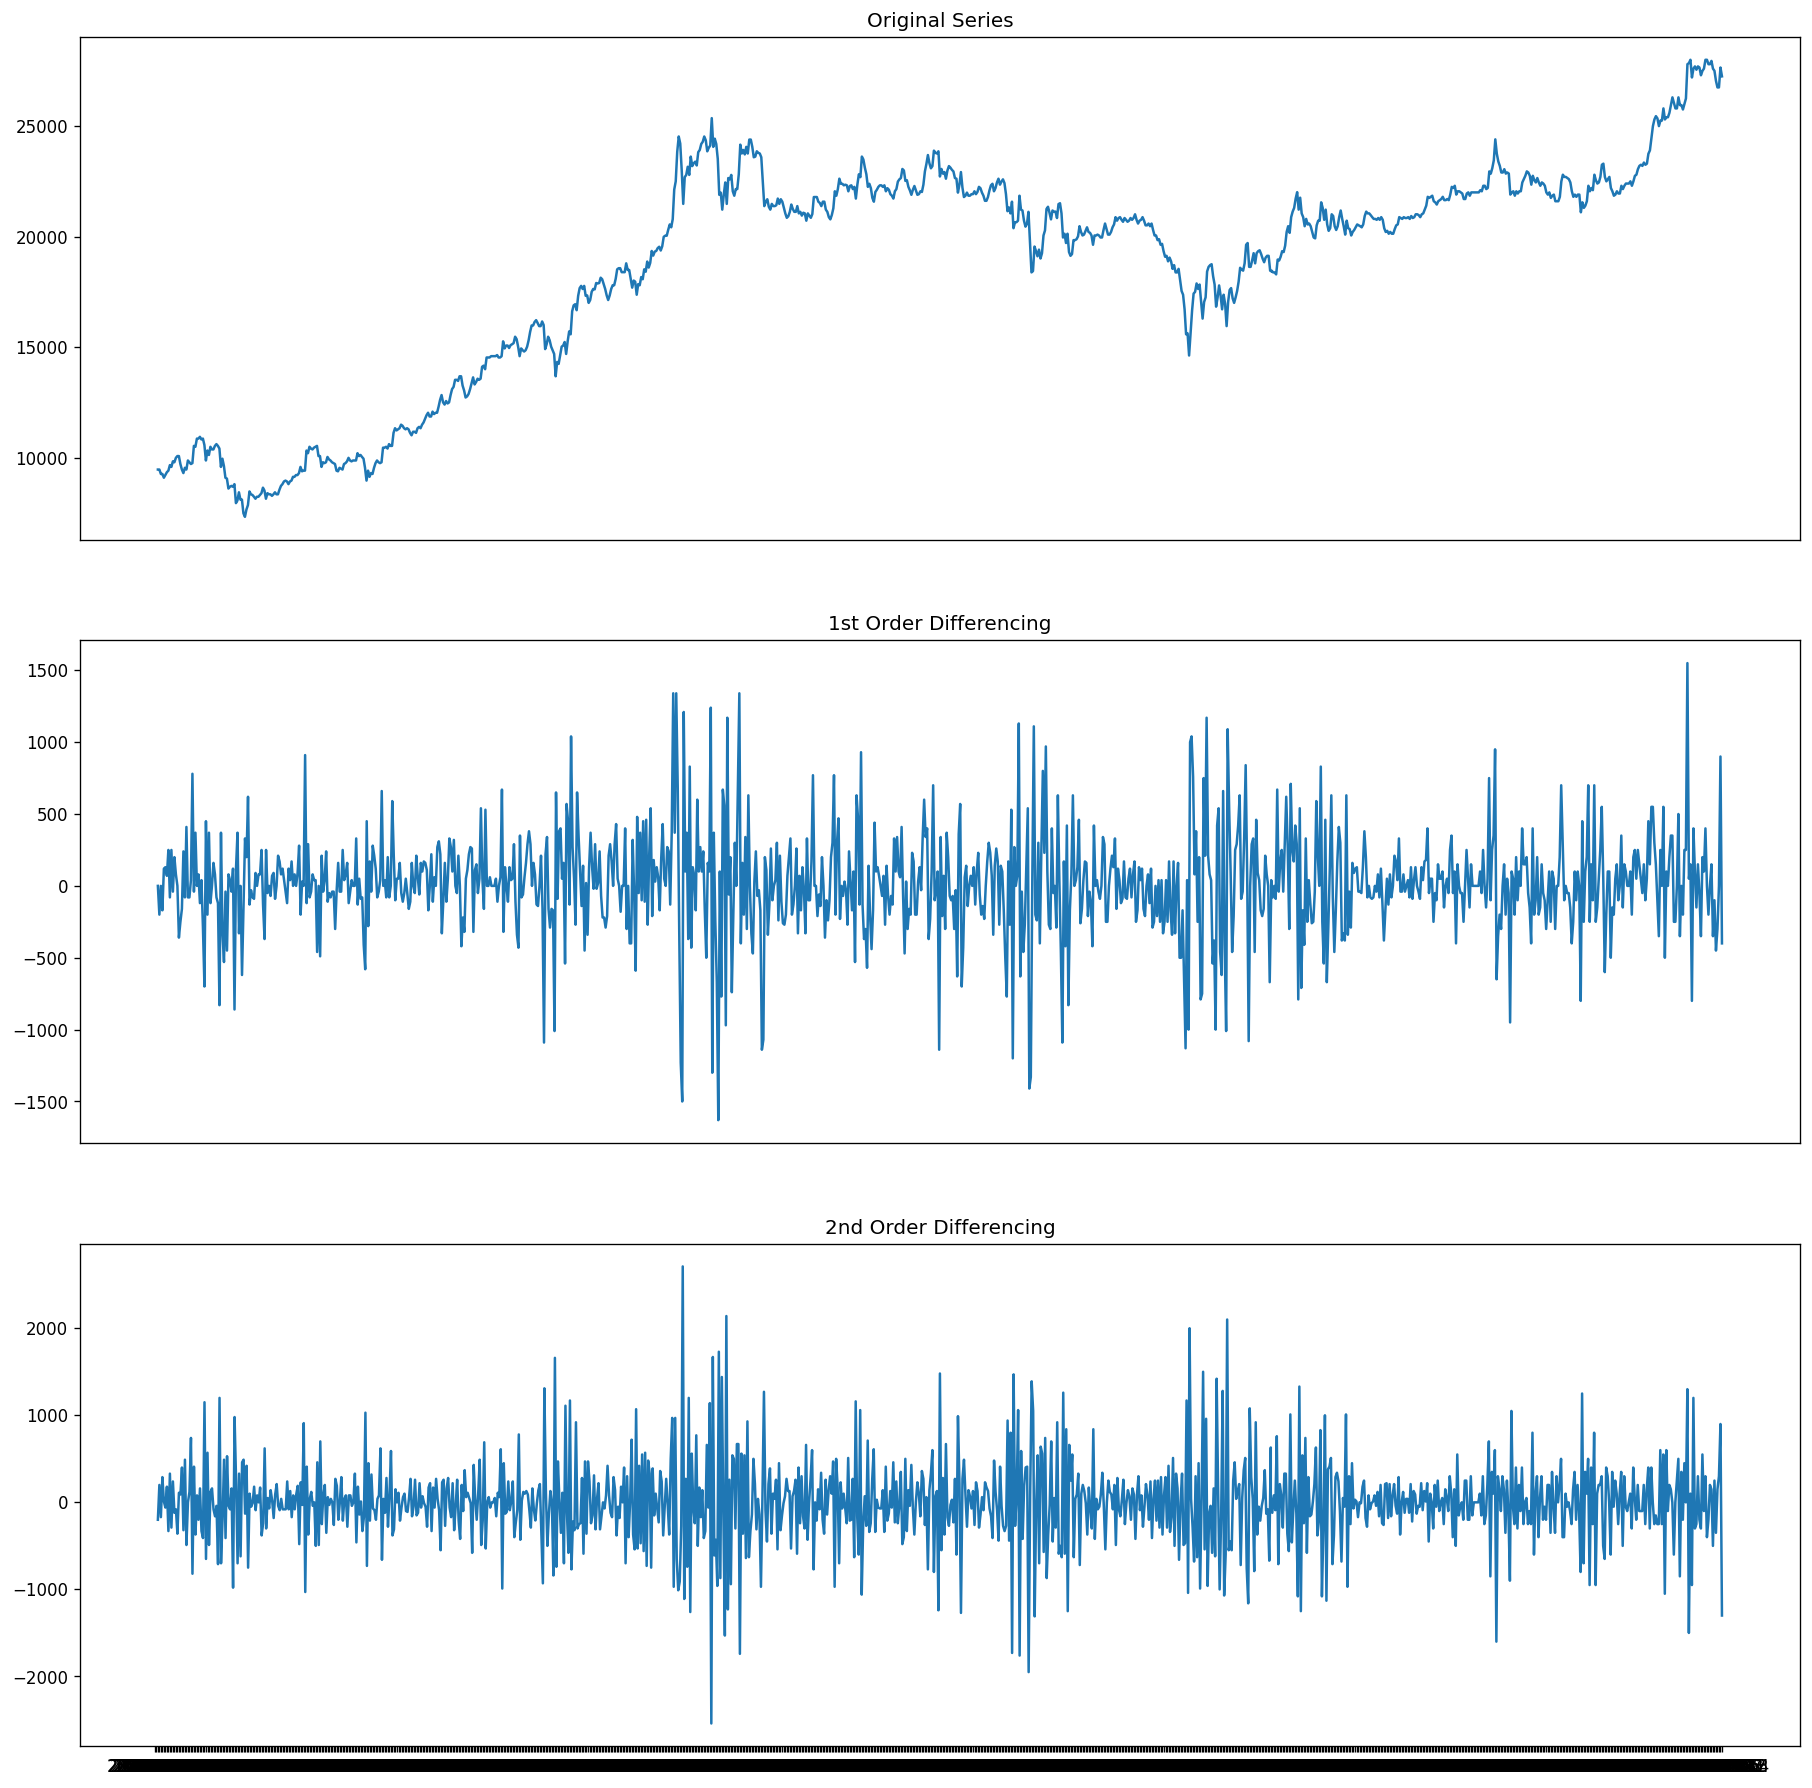

In [4]:
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(df.ACB); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(df.ACB.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(df.ACB.diff().diff()); ax3.set_title('2nd Order Differencing')
fig.set_size_inches(18.5, 18.5)
plt.show()

In [6]:
result = adfuller(df['ACB'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.244759
p-value: 0.654051
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


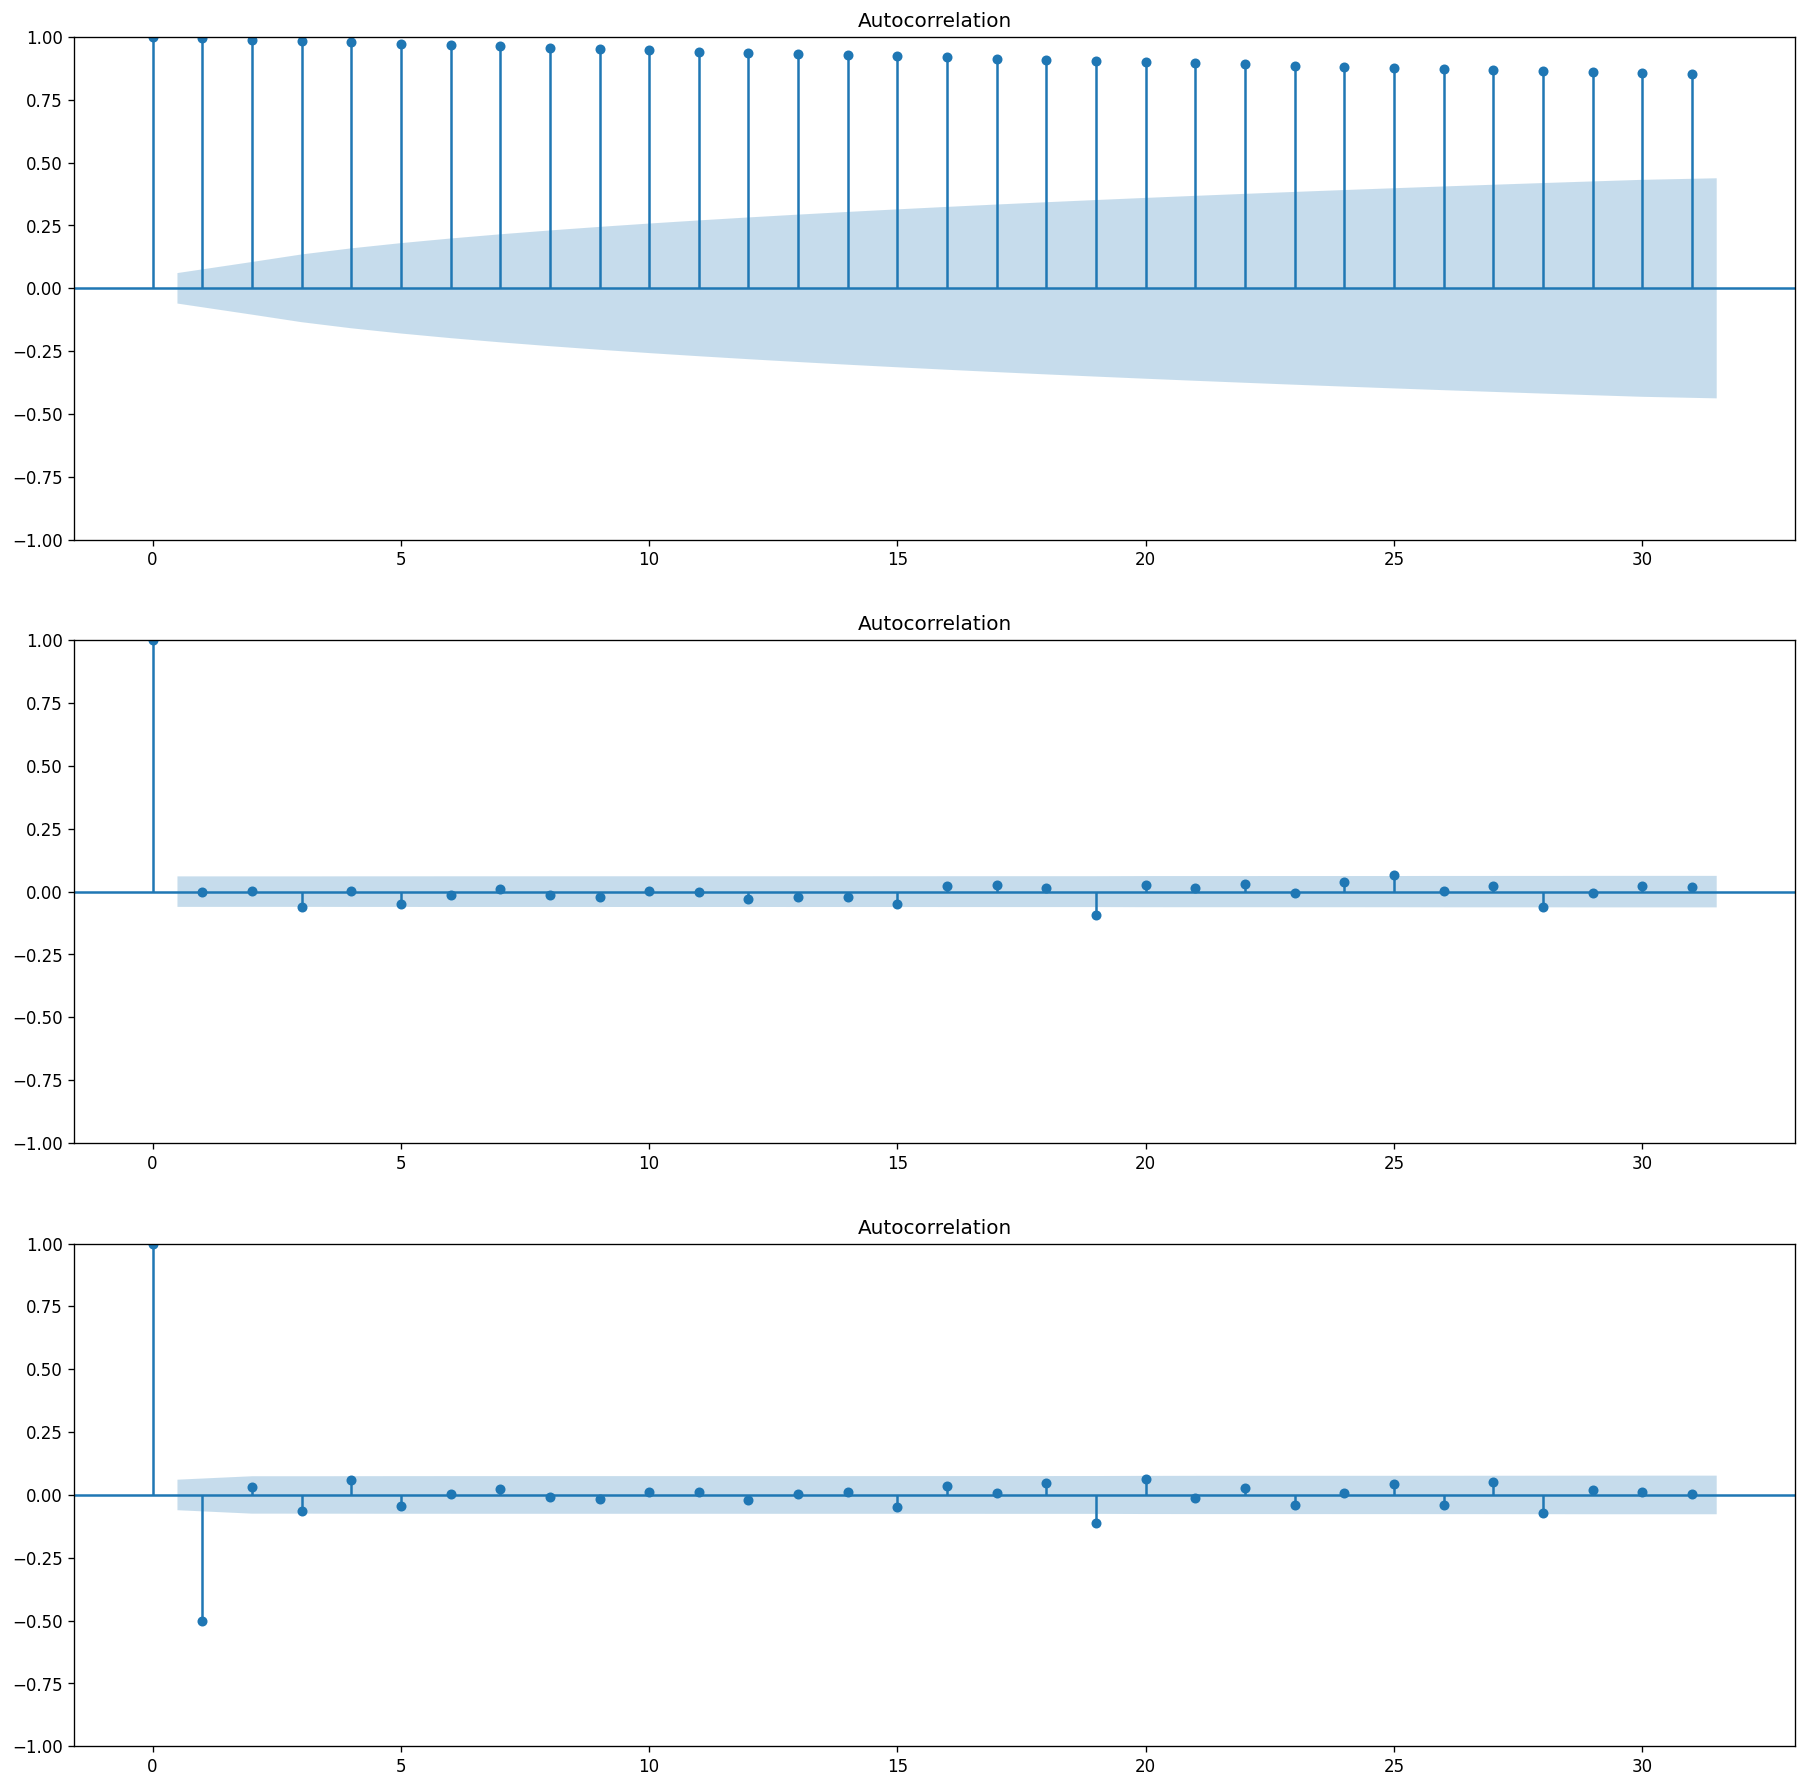

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(df.ACB, ax=ax1)
plot_acf(df.ACB.diff().dropna(), ax=ax2)
plot_acf(df.ACB.diff().diff().dropna(), ax=ax3)
fig.set_size_inches(18.5, 18.5)